Был выбран датасет "Video Game Sales". На первом этапе кода выполнена его загрузка и обработка: удаление дубликатов и импутация. Приведение типов не потребовалось: все столбцы изначально находятся в корректных типах данных.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/raghav-19/Video-Games-Sales-Data-Analysis/master/vgsales.csv"
df = pd.read_csv(url)

df.info()

df = df.drop_duplicates()

key_cols = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

for item in key_cols:
    df[item] = df[item].fillna(df[item].mean())



<class 'pandas.DataFrame'>
RangeIndex: 16539 entries, 0 to 16538
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16539 non-null  str    
 1   Platform      16539 non-null  str    
 2   Year          16290 non-null  float64
 3   Genre         16539 non-null  str    
 4   Publisher     16539 non-null  str    
 5   NA_Sales      16539 non-null  float64
 6   EU_Sales      16539 non-null  float64
 7   JP_Sales      16539 non-null  float64
 8   Other_Sales   16539 non-null  float64
 9   Global_Sales  16539 non-null  float64
dtypes: float64(6), str(4)
memory usage: 1.3 MB
         Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  \
0     Kaboom!     2600  1980.0      Misc  Activision      1.07      0.07   
1      Boxing     2600  1980.0  Fighting  Activision      0.72      0.04   
2  Ice Hockey     2600  1980.0    Sports  Activision      0.46      0.03   
3     Freeway     2600  1980.0    

Первый исследовательский вопрос: Какие платформы дали наибольшие суммарные глобальные продажи?
Для демонстрации выбран barplot.

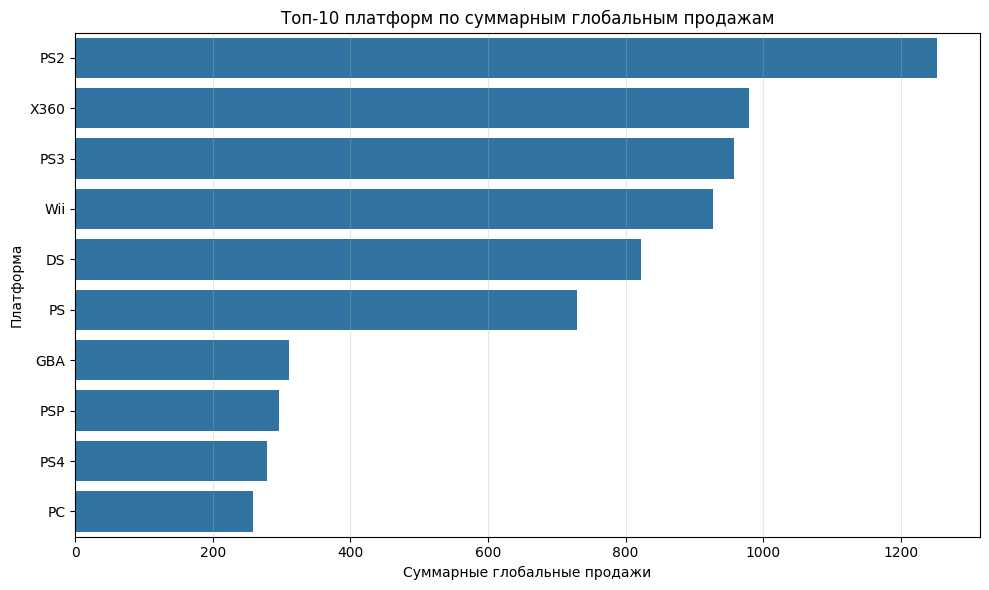

In [13]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(
    x = platform_sales.values,
    y = platform_sales.index,
    #palette = 'viridis'
)
plt.title('Топ-10 платформ по суммарным глобальным продажам')
plt.xlabel('Суммарные глобальные продажи')
plt.ylabel('Платформа')
plt.grid(axis = 'x', alpha = 0.3)
plt.tight_layout()
plt.show()


Исходя из графика платформами с наибольшим количеством продаж оказались PS2/3, X360, Wii, DS, PS. Остальные платформы сильно уступают в этом показателе.

Второй исследовательский вопрос: Насколько сильно региональные продажи коррелируют с Global_Sales?
Для исследования используется heatmap корреляций.

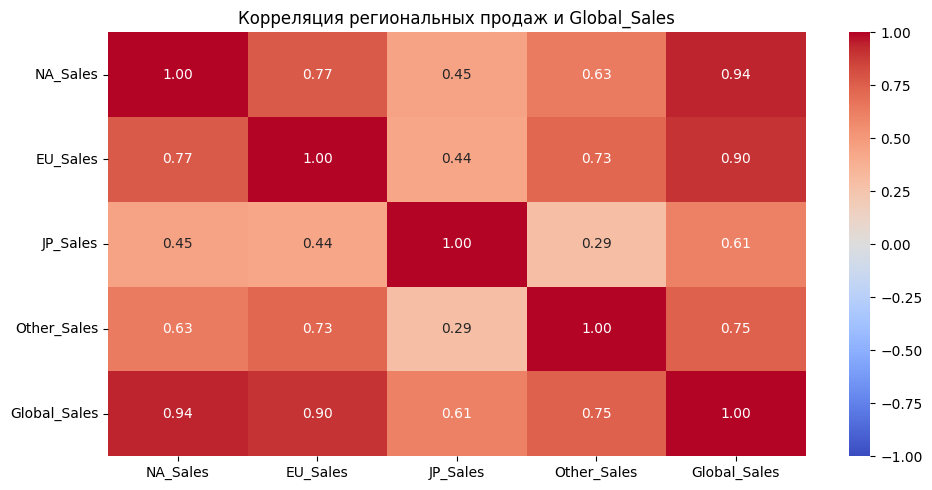

In [6]:
cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
corr = df[cols].corr()

plt.figure(figsize = (10, 5))
sns.heatmap(
    corr,
    annot = True,
    cmap = 'coolwarm',
    fmt = '.2f',
    vmin = -1,
    vmax = 1
)
plt.title('Корреляция региональных продаж и Global_Sales')
plt.tight_layout()
plt.show()


Исходя из графика мы наблюдаем положительную корреляцию для всех региональных продаж. Наименее всего со всеми коррелирует японский регион.

Дополнительно для того, чтобы наглядно увидеть, как отдельный региональный показатель соотносится с глобальными продажами используется три scatterplot с разными регионами относительно глобальных продаж.

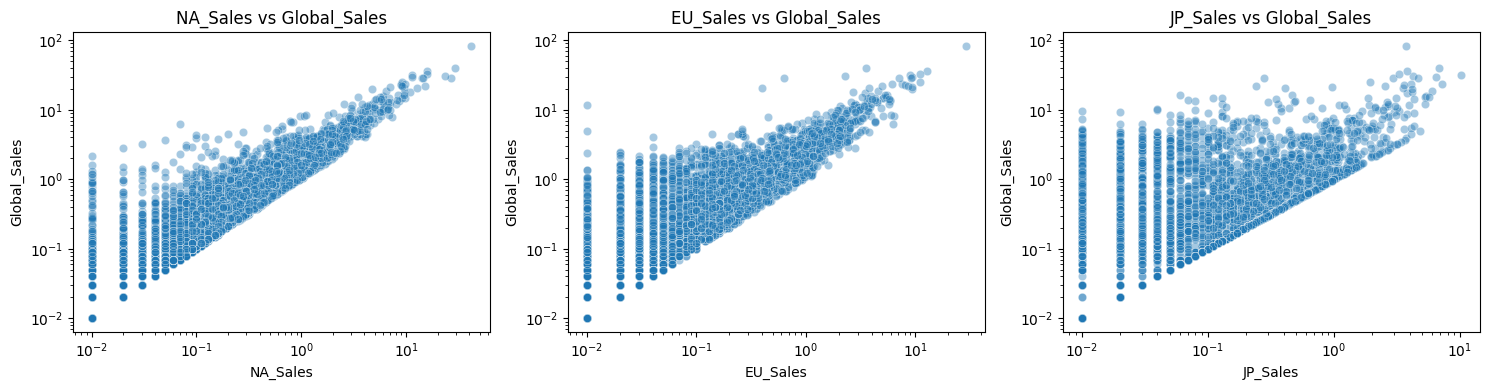

In [8]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales']
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

for ax, region in zip(axes, regions):
    sns.scatterplot(
        data = df,
        x = region,
        y = 'Global_Sales',
        alpha = 0.4,
        ax = ax
    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'{region} vs Global_Sales')
    ax.set_xlabel(region)
    ax.set_ylabel('Global_Sales')

plt.tight_layout()
plt.show()


На всех трёх графиках проглядывается чёткая диагональная линия, которая свидетельствует о прямопропорциональной зависимости региональных продаж от глобальных и соответственно о положительной корреляции. Также можно заметить, что элементов на графике с NA_Sales и EU_Sales, которые располагаются справа больше, чем таковых элементов в JP_Sales, что говорит о гораздо меньшем количестве крупных региональных продаж в Японии, чем в остальных регионах.

Третий исследовательский вопрос: Как распределяется количество глобальных продаж игр по разным жанрам в разные десятилетия?
Для изучения этого вопроса использовался boxplot, также для лучшей "чистоты" графика в анализе использовались элементы с количеством продаж, превышающим 3.

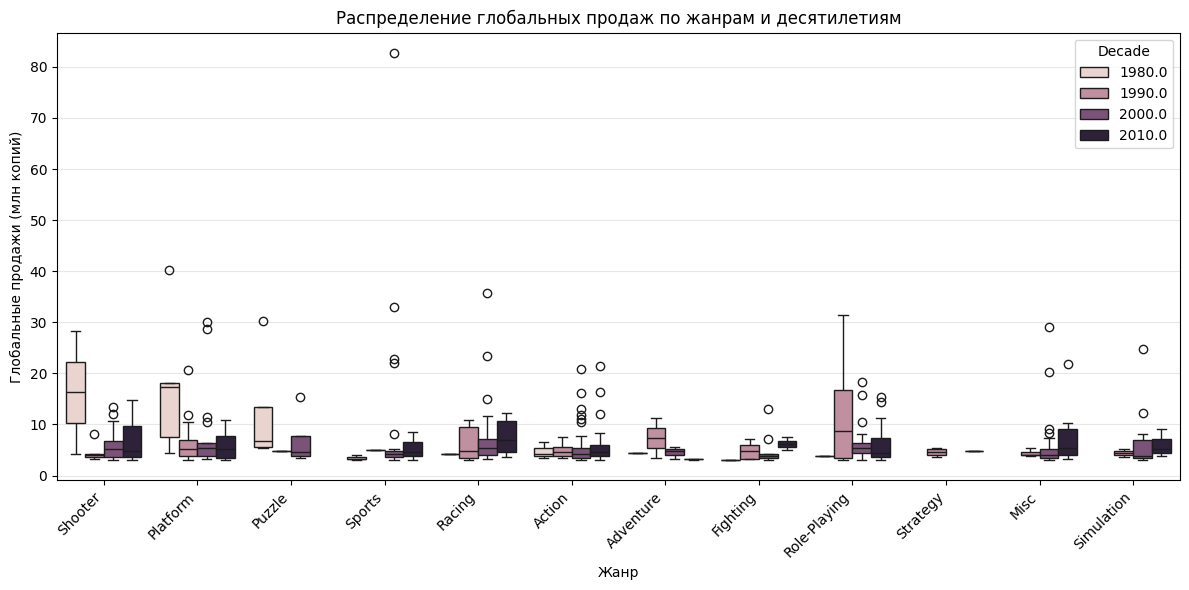

In [11]:
games_recent = df.dropna(subset = ['Year', 'Genre', 'Global_Sales'])
games_recent = games_recent[(games_recent['Year'] >= 1980) & (games_recent['Global_Sales'] > 3)]
#genres = games_recent['Genre'].value_counts().head(5).index
#print(genres)
#games_recent = games_recent[games_recent['Genre'].isin(genres)]
#print(games_recent[['Year', 'Genre', 'Global_Sales']].head())
games_recent['Decade'] = (games_recent['Year'] // 10) * 10

plt.figure(figsize = (12, 6))
sns.boxplot(
    data = games_recent,
    x = 'Genre',
    y = 'Global_Sales',
    hue = 'Decade'
)
plt.title('Распределение глобальных продаж по жанрам и десятилетиям')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи (млн копий)')
plt.xticks(rotation = 45, ha = 'right')
plt.grid(axis = 'y', alpha = 0.3)
plt.tight_layout()
plt.show()

На графике проглядывается историческое изменение количества продаж каждого из жанров. Видно, что некоторые из жанров со временем становятся менее популярны и востребованы (такие как Role-Playing и Adventure), некоторые были сильно популярны ранее и теперь продаются в менее активном темпе (Shooter, Platform), некоторые с каждым десятилетием набирают популярность (Sports, Racing, Misc, Simulation), некоторые на всем временном промежутке поддерживают стабильное число продаж на рынке (Action), а также некоторые жанры набирают высокую популярность периодически, теряя продажи между периодами (Puzzle, Fighting, Strategy).